Agenda
1. Revisit CNN Architecture , layers, Multiclass classification
2. Variours CNN Architectures-- LetNet5,AlexNet, VggNet, GoogleNet


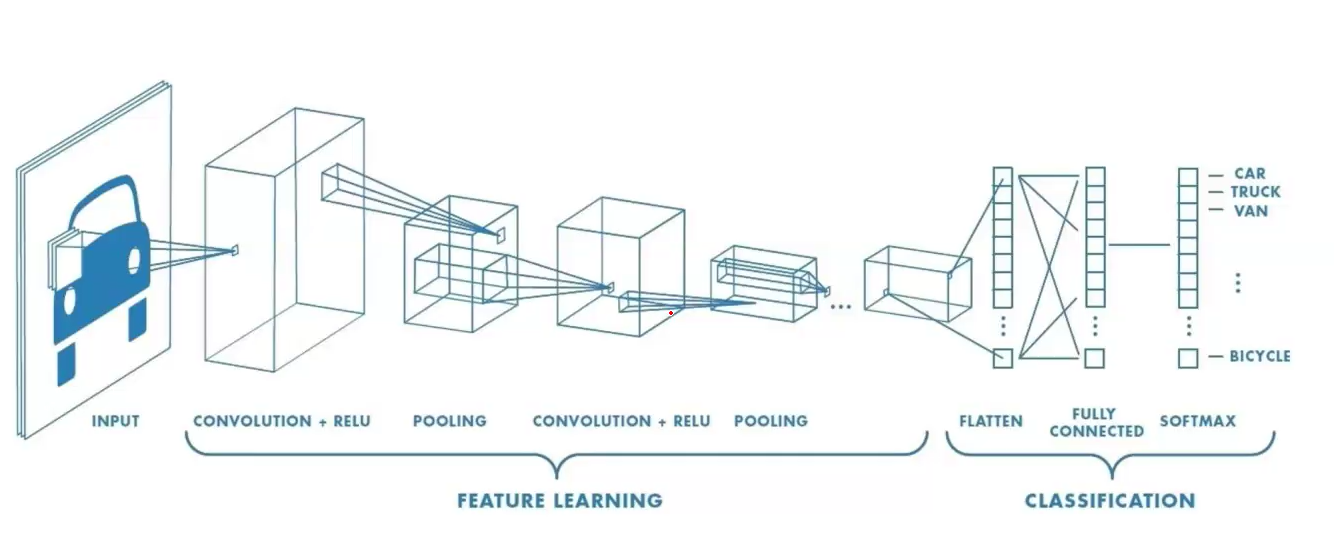

Sigmoid - varies from 0 to 1
RELU- f(x)= max(0,x) .If I have any negative number it will output zero if by example is 24 it will output 24

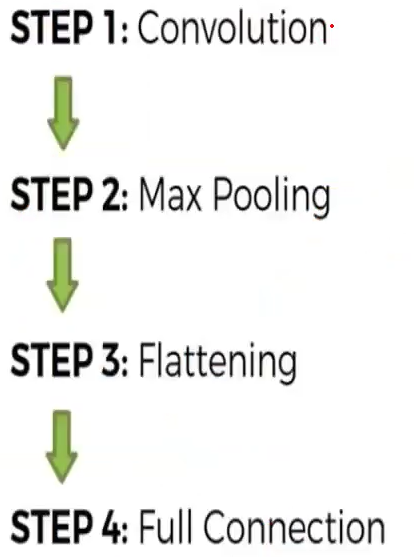

## <u>STEP 1: Convolution</u>
Average filter
Feature map - is an ouput produced by apllying a kernel to my input image, and each feature map correspond to the filters we apply to the input image.
A feature maps detects the features, edges, textures,patterns


* If the ReLU function is used for activation in a neural network in place of a sigmoid function, the value of the partial derivative of the loss function will be having values of 0 or 1 which prevents the gradient from vanishing. The use of ReLU function thus prevents the gradient from vanishing.

* Relu will keep the gradient positive, not making the learnung to slow down. we don't use Sigmoid activation function in the internal layers of the CNN only in the outside layers to predict the probabilitys between zero to one.

* Another benift of RELU comparedo the Sigmoid is that RELU is computationaly cheaper due to the simplicity of the calculations while the Sigmoid function has a exponent making it more computationaly expensive. When we work with larger datasets we want faster training

The goal of CNN is to update the weights, and the weights are the kernel matrixs, that means updating the kernel matrixs to learn the right set of features.
When we use RELU we



Since RELU is not going to use any negative value it will be zero or a postitive value, each time the convolution happens it will not slow the learning rate as it would with the Sigmoid function where after each convolution cycle the learning rate starts to slow down, ending up in saturation.

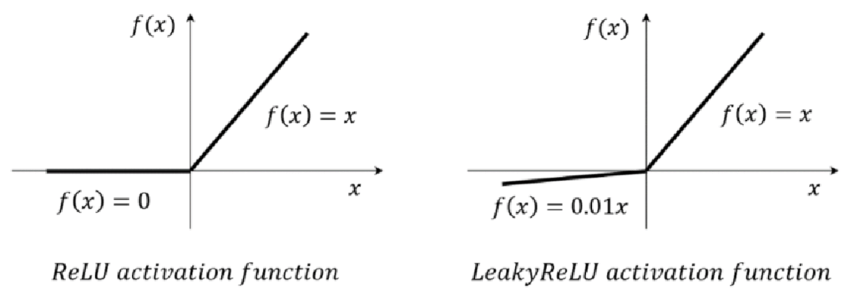

The main advantage of Leaky ReLU over the standard ReLU function is that it can help to improve the performance of deep neural networks by addressing the dying ReLU problem. By introducing a small slope for negative values of x, Leaky ReLU ensures that all neurons in the network can contribute to the output, even if their inputs are negative.

However, it is worth noting that the choice of the leakage constant a is a hyperparameter that needs to be tuned carefully, as setting it too high may cause the Leaky ReLU function to behave too much like a linear function, while setting it too low may not be enough to address the dying ReLU problem effectively.

source: https://medium.com/@sreeku.ralla/activation-functions-relu-vs-leaky-relu-b8272dc0b1be

## <u>STEP 2: Max Pooling</u>

One of the main objectives of convolution is to reduce the dimensions.

Convolution step is responsible for learning the features while max pooling is useful to downsample the data.

In max pooling we apply subsampling that is to reduce the size of the image(subsampling the pixels makes the image smaller), fewer parameters are needed to characterize the image.

The same concept of subsampling is applied in max pooling, where in next image we see that max pooling reduces the image from a matrix of 4x4 to a matrix 2x2.
In general Max pooling reduces an image to half of the original size. The maximum values in each iner square (2x2) are selected for 2x2 output matrix.


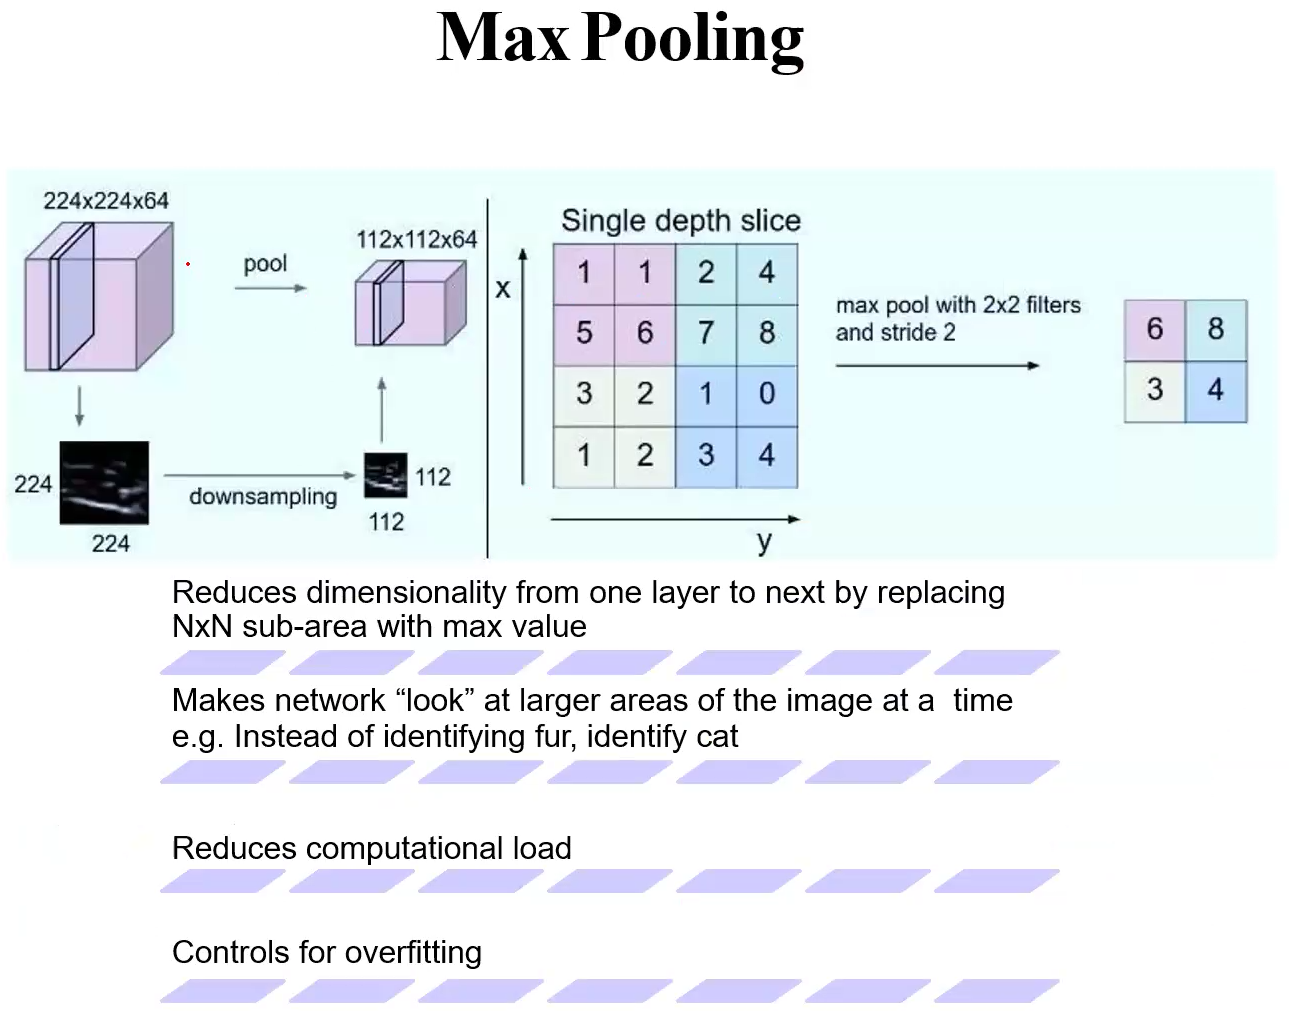

In the next image we can see the first Step where we have Convolution and RELU combined, next we have the Max pooling step. But this is only one step of low level layers we apply. This is repeated multiple times, many max pooling, many convolution layers we are going to apply to our CNN.

After all the operations we apply flattening

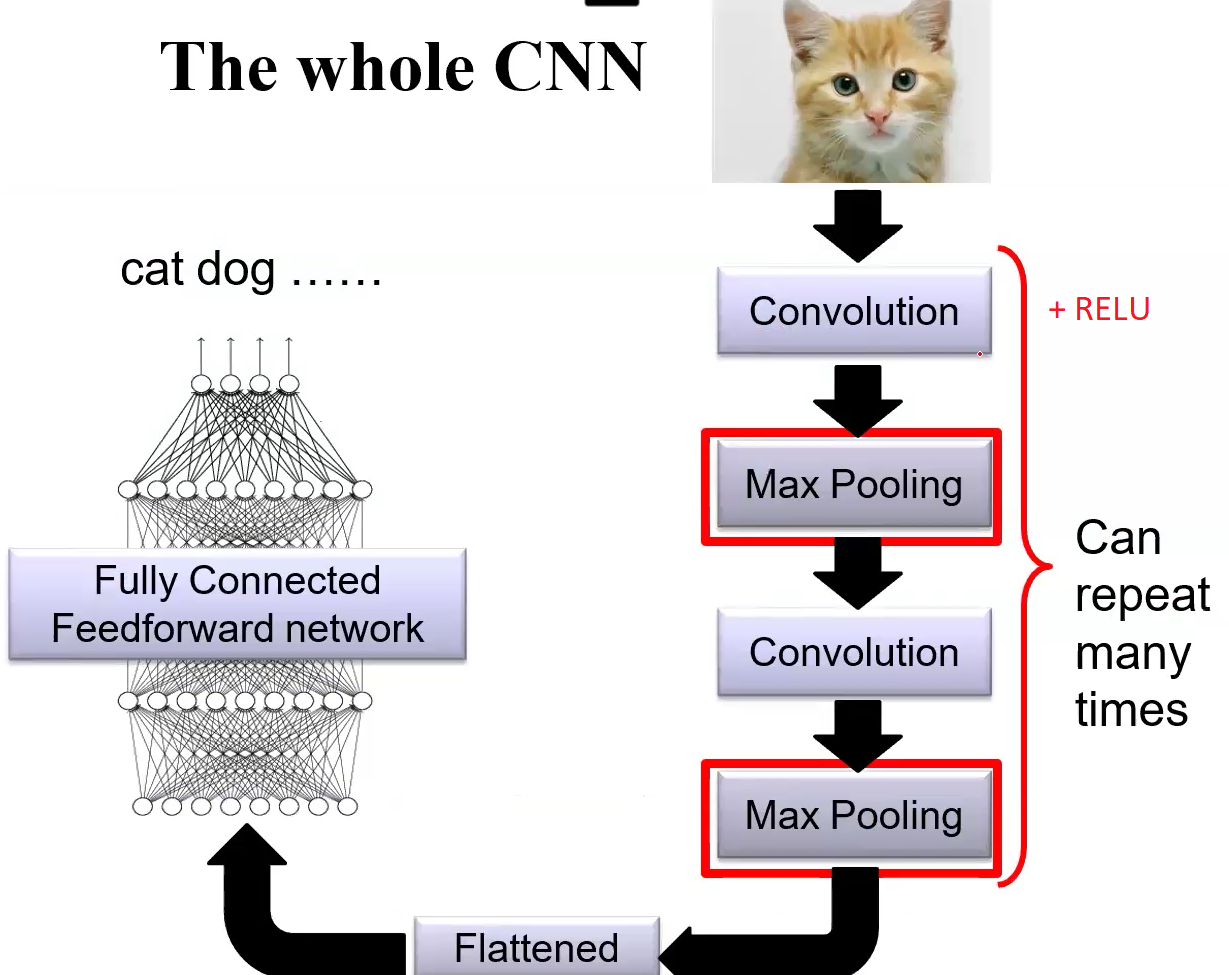

## <u>STEP 3: Flattening</u>

Flattening is to pass from multi dimension to one dimension.
We do this step in order to pass our data to the Fully Connected Feedforward network.

We are going to identify if we have a cat or other animal and if the output is wrong, we will have a misclassification.

If we have a misclassification the backpropagation happens, and we start with the filter matrixs, all the filters matrixs will get updated using the backpropagation operation and the weights will get changed, the filter value will get changed after each layer. And then again the forward propagation will happen, we will again be doing the classification, and this will happend during each epoch.

**Epoch definiton:** <u>An epoch is when all the training data is used at once and is defined as the total number of iterations of all the training data in one cycle.</u>

In each epoch we have multiple iterations, in each iteration the weights are updated

#<h1><center> <font color="green">**PROJECT** </font></center></h1>



# Develop a Multiclass classification model using CNN

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# unzip data
import shutil
shutil.unpack_archive('/content/drive/MyDrive/Computer Vision/seg_train.zip') #unzip training data
shutil.unpack_archive('/content/drive/MyDrive/Computer Vision/seg_test.zip') #unzip test data


<u>**In this image we can see on the left that the folders for the zip files were added and unpacked**</u>

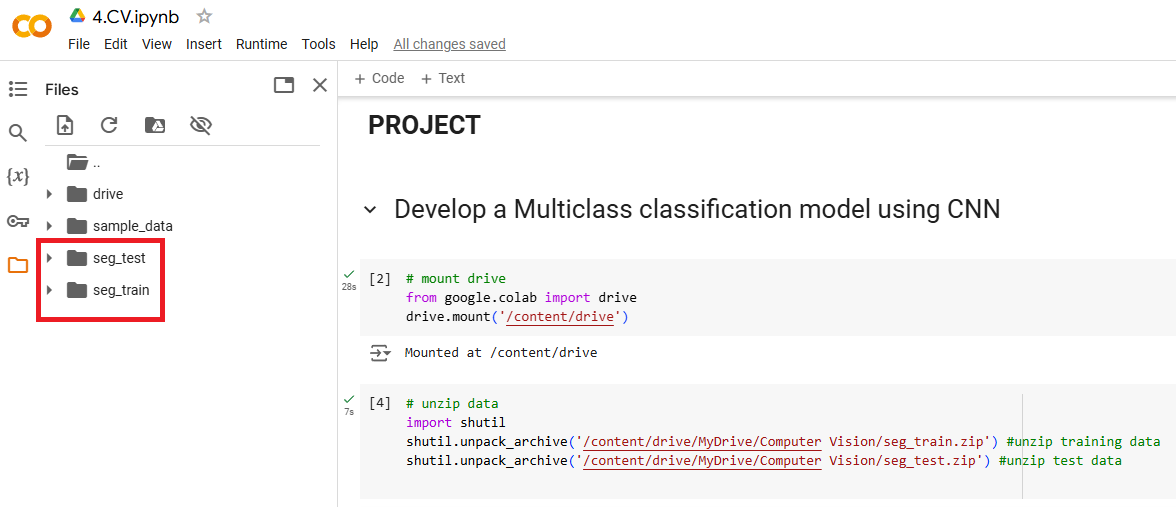

In [ ]:
# import the libaries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Load the dataset Training & testing

In [ ]:
train_dataset_path ='/content/seg_train'
test_dataset_path ='/content/seg_test'
print('data loaded')

data loaded


# Load the image data, apply data Augmentation

In [ ]:
IMG_WIDTH = 150
IMG_HEIGHT = 150
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)


In [ ]:
train_generator=train_datagen.flow_from_directory(train_dataset_path,target_size=(IMG_WIDTH,IMG_HEIGHT),batch_size=BATCH_SIZE,class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [ ]:
validation_datagen=ImageDataGenerator(rescale=1./255) #we normalize every pixel to have values between zero and 1 so the model will run faster, every pixel will be divided by 255
validation_generator=train_datagen.flow_from_directory(test_dataset_path,target_size=(IMG_WIDTH,IMG_HEIGHT),batch_size=BATCH_SIZE,class_mode='categorical',shuffle=True)
#it is categorical because we have 6 classes

Found 3000 images belonging to 6 classes.


# Get the Label Mapping

In [ ]:
labels={value:key for key,value in train_generator.class_indices.items()}
print(labels)


{0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}


# Visualization

Explanation of the code bellow:
``` python
- We are creating a figure using plt.subplots nrows=2, ncols=5 because we want to display 5 images.

- We are going to initialize the index as zero:
idx = 0

- The outer loop is 2 times because there are 2 rows
for i in range(2)

- The inner loop is 5 because we have 5 columns and 5 images will be displayed:
for j in range(5):

- We will extract the label for the current image, train generator [0][1] contains the batch for the label, np.argmax is going to find the index of the image the address of the image, argmax will allways output the index.

label = labels[np.argmax(train_generator[0][1][idx])]

Display the images:
ax[i,j].imshow(train_generator[0][0][idx][:,:,:])
        idx += 1
```

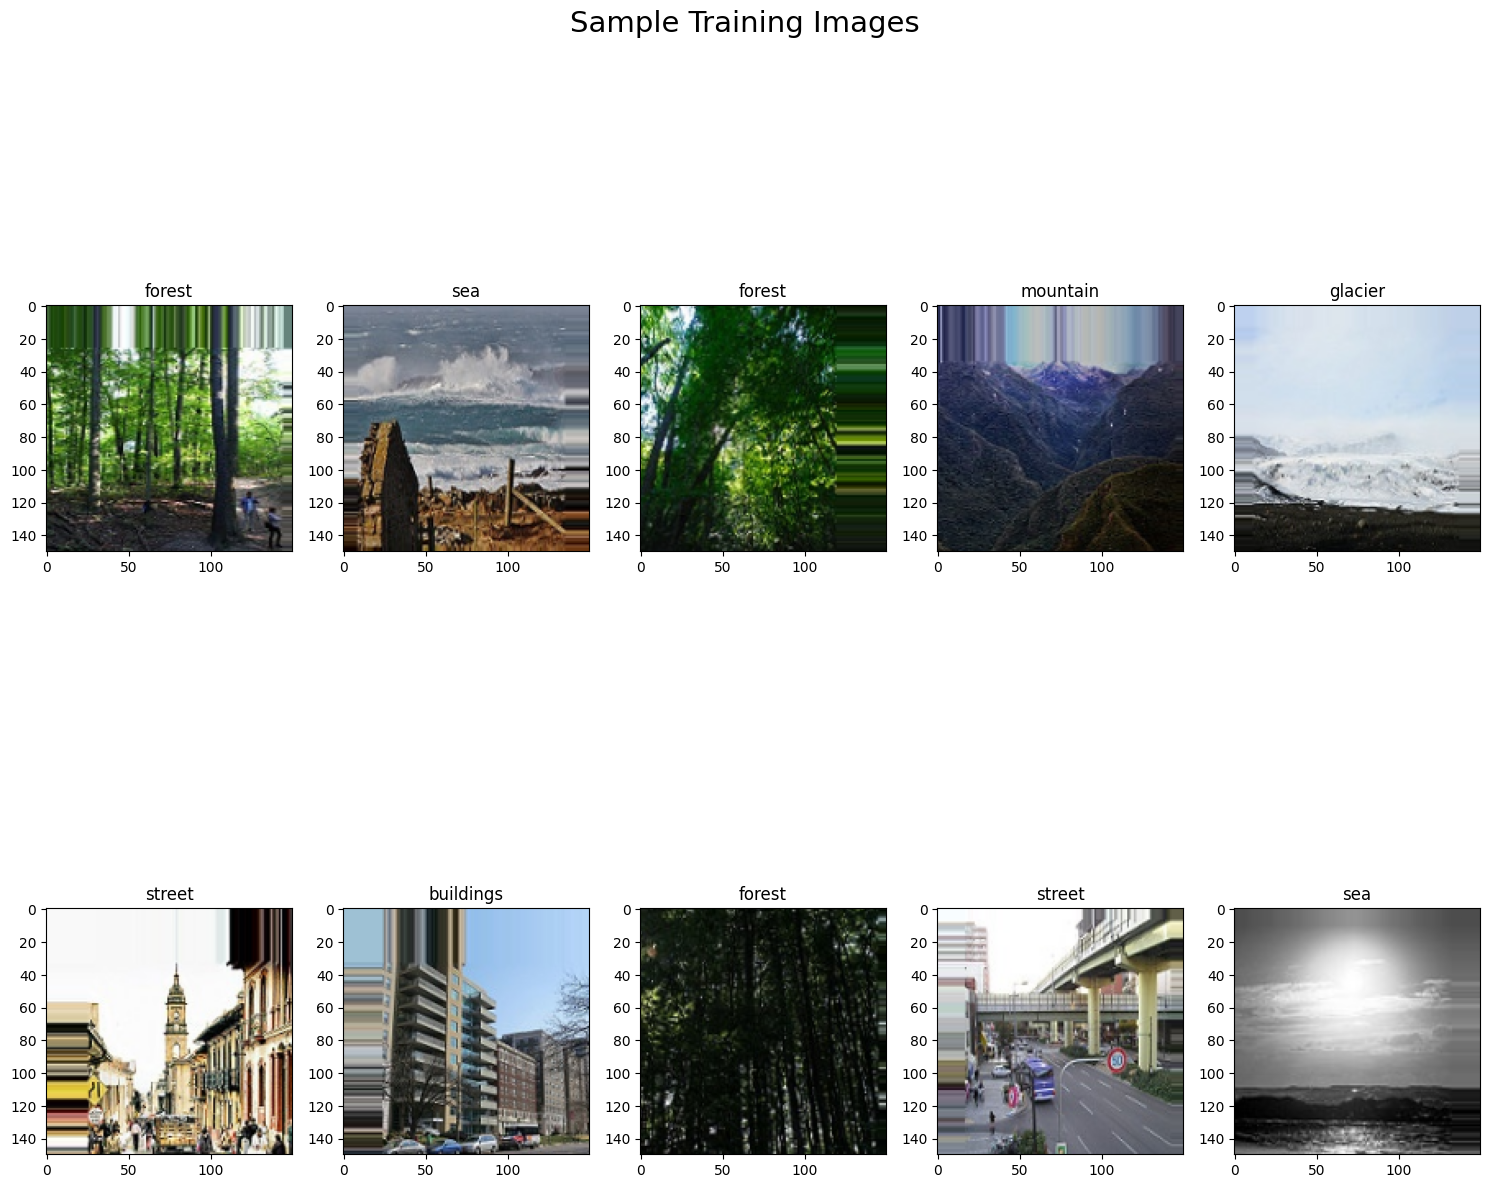

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15,15))
idx = 0

for i in range(2):
    for j in range(5):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i,j].set_title(f"{label}")
        ax[i,j].imshow(train_generator[0][0][idx][:,:,:])
        idx += 1
plt.tight_layout()
plt.suptitle('Sample Training Images', fontsize=21)
plt.show()

# Creating CNN Architecture

<u>Building the Architecture we have to make some decisions:</u>
* How many layers we want in the CNN Architecture
* The number of filters in every layer
* What should be the kernel shape
* What will be the activation function used in every layer (normaly would be RELU)
* Decide if we are going to use droput and what would be the rate of dropout, how much dropout we will allow.
* Number of ANN(Artificial Neural Networks) layers

3 layers of CNN, 2 dense layer in ANN

In [ ]:
def create_model():
    model = Sequential() #to create a sequencial neural network, the layers are stacked on top of each other, grouping  alinear stack of layers
    model.add(Conv2D(128, (5, 5), activation='relu',padding='valid', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3))) #128 filters in the first layer;kernel size of 5x5;padding=same after CNN operation the same output shape as the input
    #if we put padding= valid the output shape will be reduce what doesn't happen in the same
    #stride is how our kernel matrix window will move on
    #The last argument is input shape, if we have a color image we need to pass image width and image height and ,3 for the number of channels.

    model.add(MaxPooling2D(pool_size=(2,2))) #max pooling layer will generate a small subsample pool size is 2x2

    # 2º CNN layer - we are adding one more convolution and max pooling layer
    model.add(Conv2D(64, (3, 3), activation='relu',padding='valid'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    #3º CNN layer
    model.add(Conv2D(32, (3, 3), activation='relu',padding='valid')) #32 filters
    model.add(MaxPooling2D(pool_size=(2,2)))

    #make the multidimensional data into 1D model
    model.add(Flatten()) # we have to use mode.add or otherwise without the add it will give the error AttributeError: 'Sequential' object has no attribute 'Flatten'
    #Add ANN layers

    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(6, activation='softmax')) #since we have 6 we will use softmax to predict the probability for multiclass classification if is binary classification we could use sigmoid
    return model

In [ ]:
cnn_model=create_model()
cnn_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 146, 146, 128)       │           9,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 71, 71, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 33, 33, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │           1,542 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,200,934 (8.40 MB)

 Trainable params: 2,200,934 (8.40 MB)

 Non-trainable params: 0 (0.00 B)

## Interpretation of the summary:

* After flattening we are passing to the neural network 8192 parameters and we create an ANN, ANN will be doing the classification job. For the ANN we will first create an hidden layer with 256 neurons, at the final layer we will have 6 outputs that need to be predicted.

**Note:** model.add(Dense(6,activation='softmax')) it is the final output layer

* The input shape is 150x150x3 after the first convolution operation the output shape is 146x146x128, when we apply a filter we get one set of output called feature map, in this case we have 128 filters that will be mutiplied by our input image. After the first convolution 128 matrixes will be returned

*  ```
   |  conv2d_9 (Conv2D)                   │ (None, 146, 146, 128)       │          
├──────────────────────────────────────┼─────────────────────────────┼
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 73, 73, 128)      
   ```
There is a reduction in the shape, when it is applied this : model.add(MaxPooling2D(pool_size=(2,2))) -> the dimensions of the shape are divided by 2 (146/2 = 73)

* There is an increase in the parameters along the model

* Formula for the shape, the reason why in the first layer (│ conv2d_9 (Conv2D)) we have a shape of 146 - >   input shape - kernel + bias ;
 Our input shape is 150 the kernel is 5 and the bias is 1, 150-5+1 = 146!!!^
 The same is happening in the second layer were we have a kernel 3x3 then the kernel size is 3 and the bias is also 1 and the inout shape is now 146, if we do 73-3+1 = 71

 **Note:** The CNN is doing a job of feature extraction and dimensionality reduction

# Compile the model

In [ ]:

cnn_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy']) #optimizer is used to update the weight during the training, for loss function we are going to use cross entropy because is a multiclassification problem


- We can create various callbacks in my model, i can work in my learning rate, model checkpoints, check if the losses are not decreasing we can stop the training.

- We can use sparse categorical crossentropy, but the difference between sparse categorical crossentropy and categorical crossentropy is that when we are working on our labels, those are in integers. Like 0 1 2 3 4 we will work with the sparse categorical crossentropy function, where we don't have the output data into one-hot-encoding.
<br> **To summarize:**
 ```
 0 1 2 3 4 - sparse categorical crossentropy
 one hot encoding  - categorical crossentropy
 ```


In [ ]:
# training the model - to make it faster go to Runtime->Change runtime type->T4 GPU->Re run all the code in this notebook
history = cnn_model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 108s 242ms/step - accuracy: 0.6068 - loss: 0.9950 - val_accuracy: 0.6670 - val_loss: 0.8796
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 142s 244ms/step - accuracy: 0.6777 - loss: 0.8567 - val_accuracy: 0.7240 - val_loss: 0.7404
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 141s 241ms/step - accuracy: 0.7022 - loss: 0.7847 - val_accuracy: 0.7647 - val_loss: 0.6619
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 143s 244ms/step - accuracy: 0.7309 - loss: 0.7205 - val_accuracy: 0.7670 - val_loss: 0.6445
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 144s 249ms/step - accuracy: 0.7573 - loss: 0.6627 - val_accuracy: 0.7573 - val_loss: 0.6578
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 111s 249ms/step - accuracy: 0.7635 - loss: 0.6463 - val_accuracy: 0.7457 - val_loss: 0.6757
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 110s 249ms/step - accuracy: 0.7802 - loss: 0.6040 - val_accuracy: 0.7897 - val_loss: 0.5886
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 106s 239ms/step - accuracy: 0.7905 -

How /439 in each epoch is coming? It is the total number of training images divided by the batch size

We have 14034 images belonging to 6 classes if we divide them by 32 batches we will have 32 batches.

14034/32

In [ ]:
# Evaluate the model
test_loss, test_acc = cnn_model.evaluate(validation_generator)
print('Test Loss:', test_loss)
print('Test accuracy:', test_acc)

94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 233ms/step - accuracy: 0.8114 - loss: 0.5346
Test Loss: 0.5230734944343567
Test accuracy: 0.8100000023841858


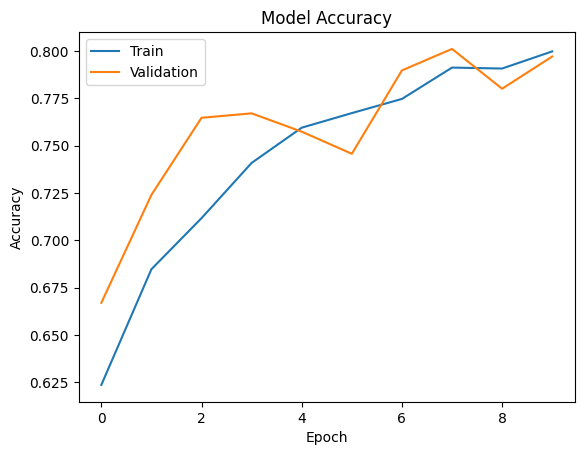

In [ ]:
# plot the train accuracy vs test accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

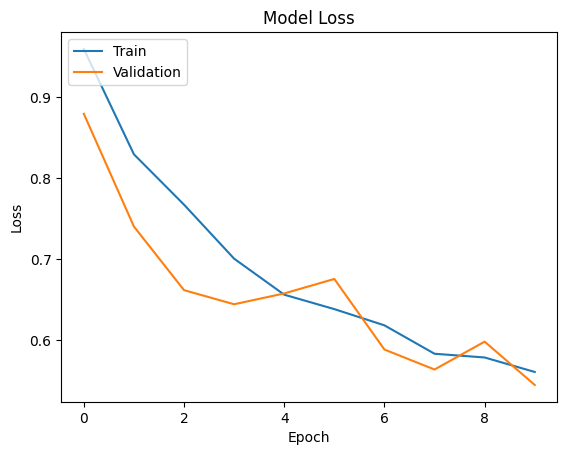

In [ ]:
# plot the train and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
#

In [ ]:
# save the model
cnn_model.save('cnn_model.h5')
print('Model saved successfully')

Model saved successfully


In [25]:
# load the cnn model
cnn_model=tf.keras.models.load_model('cnn_model.h5')
print('model saved')

model saved


# Prediction

In [26]:
# check the data in our test dataset, test the model in our validation dataset
prediction=cnn_model.predict(validation_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 180ms/step


We are doing the prediction to test in which of the validation images we are getting the correct output or the wrong output.

We can load another dataset of images but we need to do the same steps of PRE PROCESSING the images.

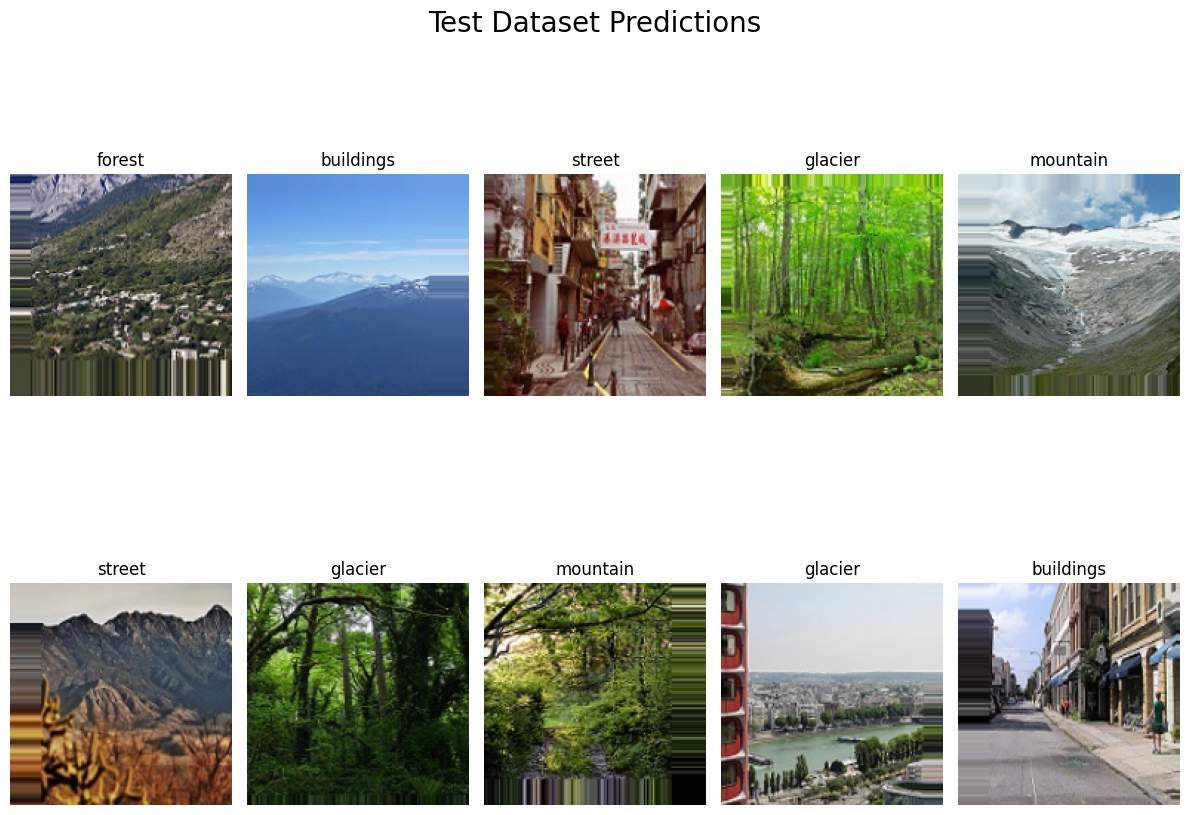

In [28]:
# show prediction on some images from validation data
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12,10))
idx = 0

for i in range(2):
  for j in range(5):
    predicted_label = labels[np.argmax(prediction[idx])]
    ax[i,j].set_title(f"{predicted_label}")
    ax[i,j].imshow(validation_generator[0][0][idx])
    ax[i,j].axis('off')
    idx += 1

plt.tight_layout()
plt.suptitle('Test Dataset Predictions', fontsize=20)
plt.show()


We can see in the images above that are some correct predictions but also some misclassifications like the fourth image in the first row that is a forest and was classified as a glacier.

One of the reasons is due to running the model with 10 epoch, resulting in a low accuracy. If we run with 50 epochs the results would be much better. But **we can improve the model!!!!**

# Create confusion matrix

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
# Our softmax function calculating the probablitys on our input
# Six probabilitys are calculate for each image in the dataset
prediction

array([[3.3905690e-07, 9.9999678e-01, 2.6444297e-06, 1.2553544e-07,
        7.5878026e-10, 1.2224744e-07],
       [8.8659012e-01, 1.0120068e-06, 1.0729535e-05, 2.3941650e-06,
        3.7552039e-05, 1.1335806e-01],
       [1.3500041e-01, 6.7635484e-02, 3.4114632e-03, 3.8138587e-05,
        3.7864354e-04, 7.9353589e-01],
       ...,
       [6.9272972e-04, 4.3364638e-03, 3.3028867e-02, 9.4329911e-01,
        1.7875735e-02, 7.6713954e-04],
       [2.0623426e-03, 7.6928420e-04, 8.4029501e-03, 1.9978368e-01,
        7.8122103e-01, 7.7607310e-03],
       [2.4303389e-03, 2.9241545e-03, 3.8800317e-01, 2.8654894e-01,
        3.1220993e-01, 7.8833578e-03]], dtype=float32)

In [31]:
# takes out the probability in the six probabilitys for a given image that has the higher value
y_pred = np.argmax(prediction, axis=1)
y_true = validation_generator.classes

In [32]:
y_pred

array([1, 0, 5, ..., 3, 4, 2])

We can see that the highest probability for the first image is on index 1 like we see above, in the second image is on index 0....

In [33]:
y_true

array([0, 0, 0, ..., 5, 5, 5], dtype=int32)

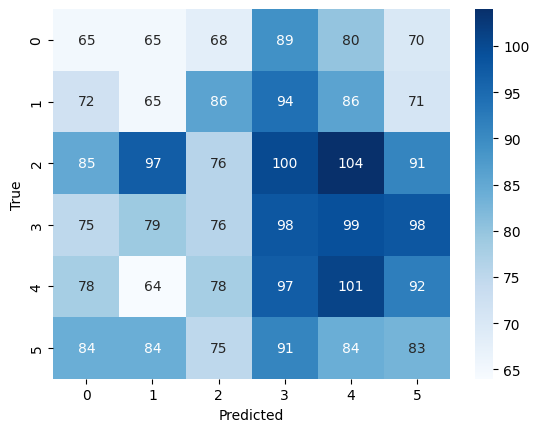

In [35]:
# create a confusion matrix
import seaborn as sns
cnn = confusion_matrix(y_true, y_pred)
sns.heatmap(cnn, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


**0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'**

Looking at the confusion matrix it is hard to point which one of the labels is the one that has more misclassification.

It is important to understand which labels are worst in terms of being classified correctly, because in the future we could get more images for that specific lebel in order to improve the classification accuracy. We could have an imbalaced dataset, by example we could have more images of mountains resulting in better classification compared to other labels.

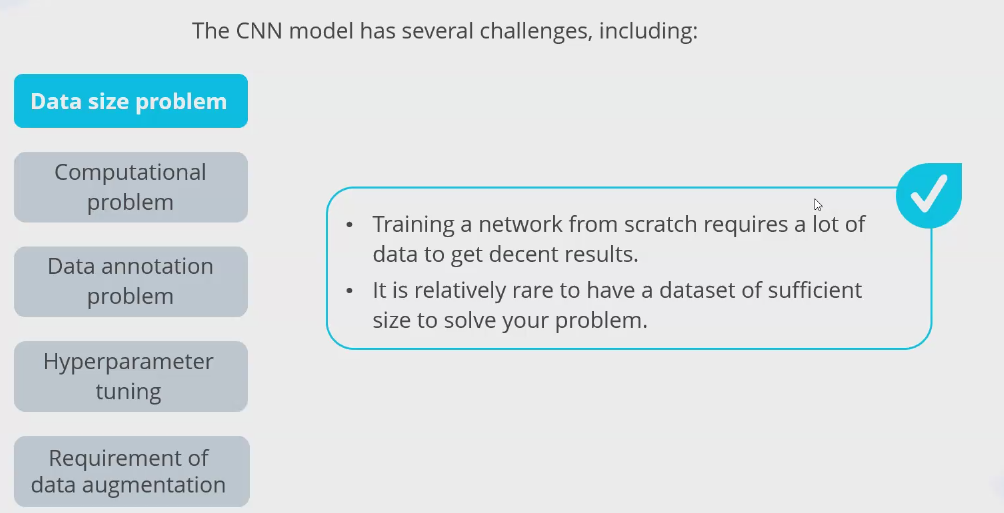


accuracy --80%

misclassifcation---

Some solutions to improve the model:

-Transfer learning

Link to open dataset with a large amount of images and labels to train CNN models: https://www.image-net.org/

There are some pre trained models that were trained in the image net dataset we can see them on the following link: https://keras.io/api/applications/

We can and we should use pre-trained models like the ones above, and we call this transfer learning, where we use a model trained in another dataset to run our dataset. Note: this pre-trained models won competitions and used resources that we possibly won't have easy access like GPU's, a team a persons to create test and create the best architecture in order to optimize the task at hand.

Creating a CNN model from scratch will cost time, computational resources and we would end with worst results then the ones gained by using a pre-trained model.

**Example of project:**

Project - flower classification

Transfer Learning-

1.Pre Train Model ResNet50 -- Trained on ImageNet Dataset, develop classification model

We load the pre trained model in my program.

For each model in we can see the reference paper and read how the researcher came up with the model
in case we need to explain how the model was made. https://keras.io/api/applications/resnet/#resnet50-function

Start learning from scratch with the first architecture created (**LeNet**) then we will move to more advanced architectures like the **Xception** (https://keras.io/api/applications/xception/ ; reference article : https://arxiv.org/abs/1610.02357) created by François Chollet a Google engineer and creator of Keras.

# Agenda - deeply understand each architecture

1º Elementary architecure:
- LeNet-5

2º Advanced architecures

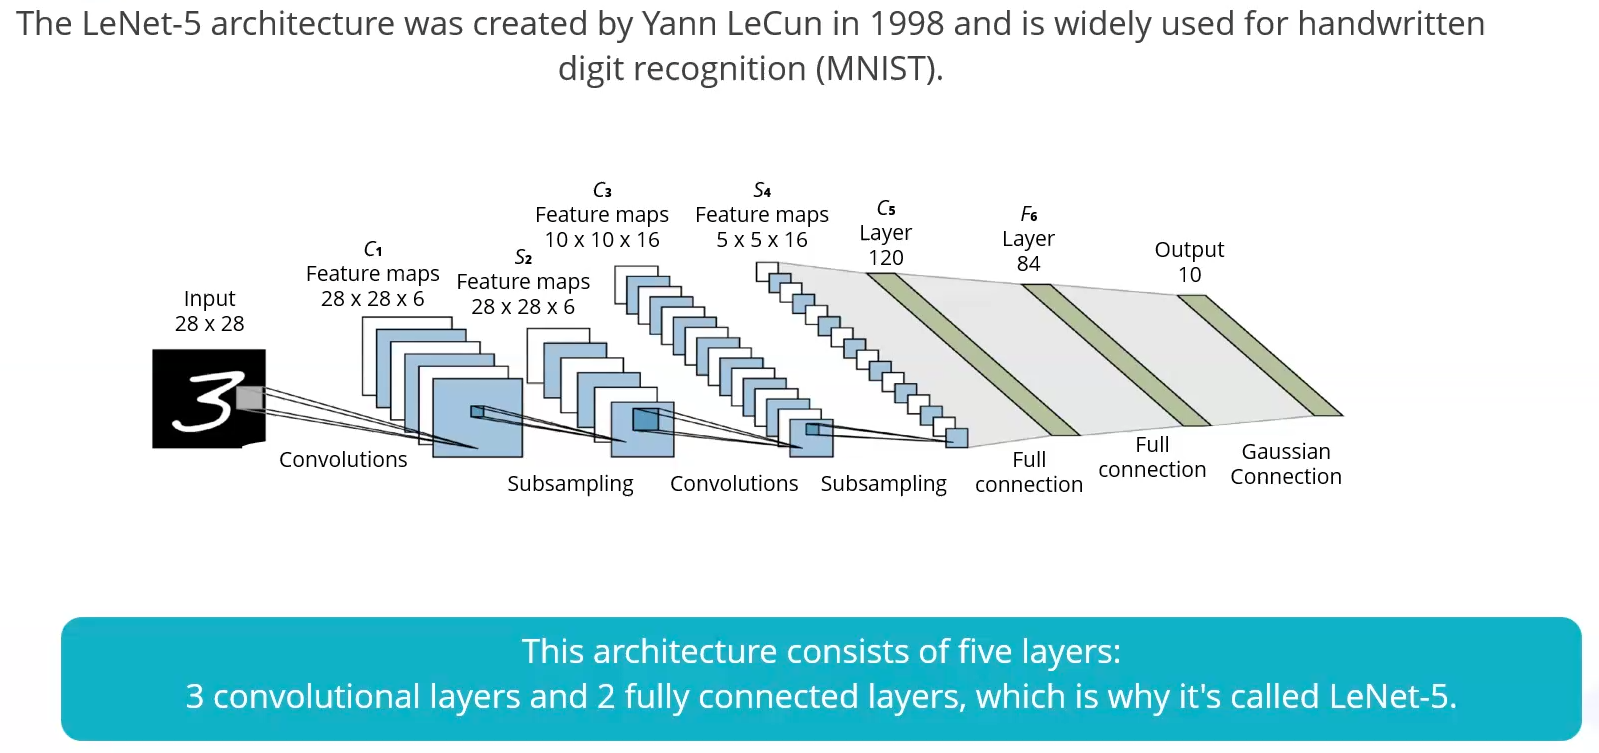

The **aproach** to CNN models should be **analytical** we should understand the CNN architectures and for that learning different already pre trained architectures is important, being crucial to read the papers for each distinct architecture (at lest the most important ones!!!). It is a <u>great habit to read the research paper</u>.

# Implement LeNet-5

Research paper link:
http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the Mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.reshape(-1,28,28,1).astype('float32')/255.0, x_test.reshape(-1,28,28,1).astype('float32')/255.0
y_train, y_test = to_categorical(y_train,10), to_categorical(y_test,10)






11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
x_train.shape

(60000, 28, 28, 1)

In [3]:
x_test.shape

(10000, 28, 28, 1)

We are training on 60 000 images and testing on 10 000 images, 86% of the dataset is for training and 14% is for testing

## LeNet -5 Architecture

In [4]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=5,strides= 1, activation='tanh', input_shape=(28,28,1),padding= 'same'))
model.add(AveragePooling2D(pool_size=2, strides=2, padding= 'valid'))

model.add(Conv2D(filters=16, kernel_size=5,strides= 1, activation='tanh', padding= 'valid'))
model.add(AveragePooling2D(pool_size=2, strides=2, padding= 'valid'))

model.add(Conv2D(filters=120, kernel_size=5,strides= 1, activation='tanh', padding= 'valid'))

model.add(Flatten())

model.add(Dense(84, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# This part is similar for other models, what is important to retain is the construction of the architecture
#above, the logic underlying the choices made in the building blocks

#################NOT RELEVANT TO UNDERSTAN EACH MODEL!!!! CODE IDENTICAL FOR ANY MODEL WE WANT TO RUN#############
# Compile the mode
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc * 100:.2f}%')

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 46s 47ms/step - accuracy: 0.9895 - loss: 0.0330 - val_accuracy: 0.9838 - val_loss: 0.0519
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 46ms/step - accuracy: 0.9925 - loss: 0.0244 - val_accuracy: 0.9846 - val_loss: 0.0482
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 46ms/step - accuracy: 0.9933 - loss: 0.0212 - val_accuracy: 0.9801 - val_loss: 0.0685
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 46ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9832 - val_loss: 0.0534
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.9948 - loss: 0.0161 - val_accuracy: 0.9838 - val_loss: 0.0522
313/313 - 2s - 8ms/step - accuracy: 0.9838 - loss: 0.0522
Test accuracy: 98.38%


**NOTE:**

```
In model.evaluate(x_test, y_test, verbose=2), the verbose argument controls the level of detail shown during the evaluation process in Keras/TensorFlow.

Here’s what the different verbose values mean:

* verbose=0: No output is printed during evaluation. This mode is silent.
* verbose=1: A progress bar is displayed, showing evaluation progress.
* verbose=2: A single line is printed for each evaluation step, summarizing the final evaluation score without a progress bar.

In this case, verbose=2 means the function will output a concise summary of the evaluation metrics once the model finishes evaluating on x_test and y_test. This mode is commonly used when you only want to see the result and not a step-by-step progress indicator.
```

Next we are going to talk about AlexNet

We should read first the paper : https://paperswithcode.com/method/alexnet